# EDA_FE 과제
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/younyoung/Library/Mobile Documents/com~apple~CloudDocs/YBIGTA/2024-1 교육세션/0109 EDA-FE/Data/airbnb_listings.csv', index_col=0)

/var/folders/31/h029hgfj1d78nptdq7y8vwh00000gn/T/ipykernel_92005/4276139125.py:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/younyoung/Library/Mobile Documents/com~apple~CloudDocs/YBIGTA/2024-1 교육세션/0109 EDA-FE/Data/airbnb_listings.csv', index_col=0)


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [4]:
# Q1
df.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,...,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,...,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,...,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,...,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,...,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [5]:
# Q2
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50796 entries, 0 to 50795
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_response_time                31790 non-null  object 
 2   host_response_rate                31790 non-null  object 
 3   host_acceptance_rate              36781 non-null  object 
 4   host_is_superhost                 50791 non-null  object 
 5   host_listings_count               50791 non-null  float64
 6   host_total_listings_count         50791 non-null  float64
 7   host_verifications                50791 non-null  object 
 8   host_has_profile_pic              50791 non-null  object 
 9   host_identity_verified            50791 non-null  object 
 10  neighborhood                      50796 non-null  object 
 11  latitude                          50796 non-null  float64
 12  longitude

In [6]:
#Q2
missing_num = df.isnull().sum()
missing_ratio = (missing_num / len(df)) * 100
missing_data = pd.concat([missing_num, missing_ratio.round(1)], axis=1, keys=['missing_num', 'missing_%'])
missing_data = missing_data[missing_data['missing_num'] > 0].sort_values(by='missing_num', ascending=False)
missing_data


,missing_num,missing_%
jurisdiction_names,50781,100.0
license,50759,99.9
square_feet,50407,99.2
monthly_price,46119,90.8
weekly_price,45411,89.4
host_response_rate,19006,37.4
host_response_time,19006,37.4
security_deposit,17325,34.1
host_acceptance_rate,14015,27.6
review_scores_value,11482,22.6


- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

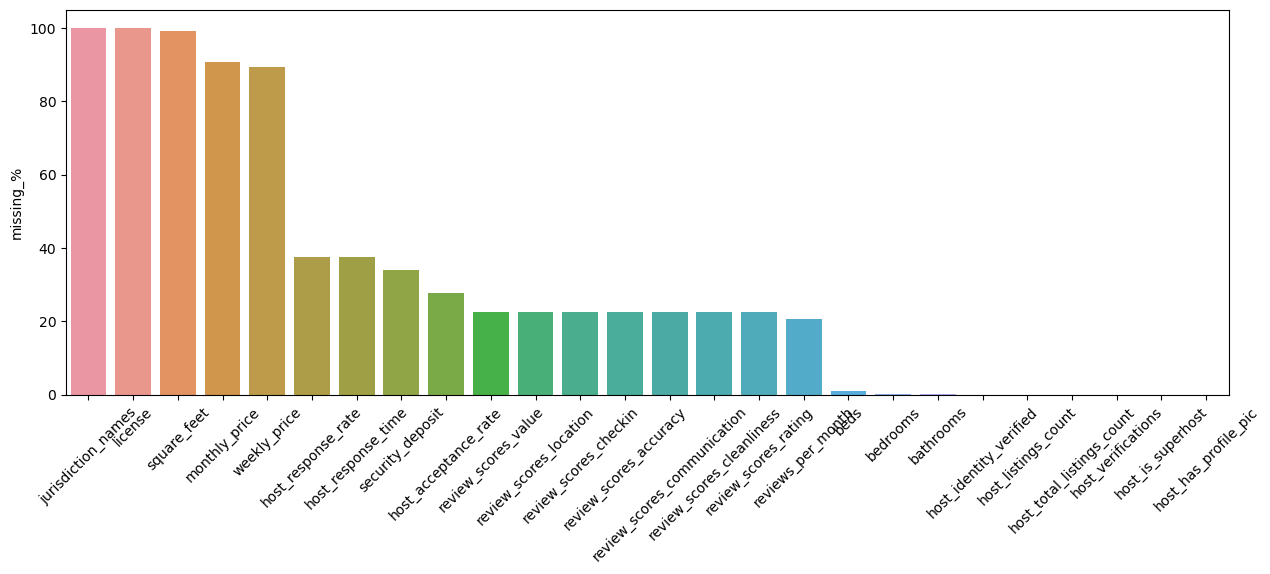

In [7]:
# Q3
plt.figure(figsize=(15, 5))
sns.barplot(x=missing_data.index, y='missing_%', data=missing_data)
plt.xticks(rotation=45)
plt.show()

- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다.
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [8]:
# Q4
df[df['beds'].isnull()].head(5)

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,...,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,...,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,...,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,...,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,...,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [9]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [10]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50791 non-null  object 
 2   host_listings_count               50791 non-null  float64
 3   host_total_listings_count         50791 non-null  float64
 4   host_verifications                50791 non-null  object 
 5   host_has_profile_pic              50791 non-null  object 
 6   host_identity_verified            50791 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room_type

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다.
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

<Axes: xlabel='room_type', ylabel='count'>

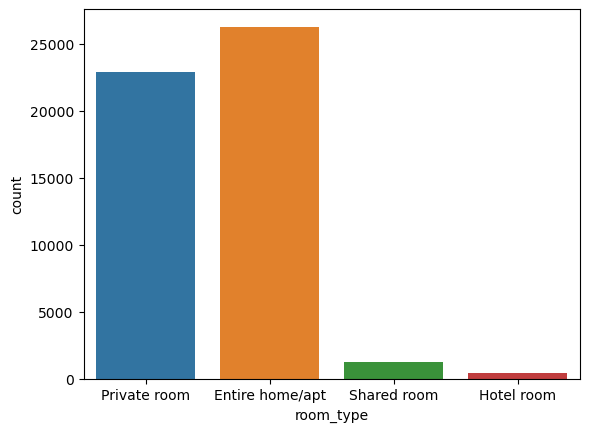

In [12]:
# Q5
sns.countplot(x='room_type', data=df)

- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

Text(0, 0.5, 'ratio')

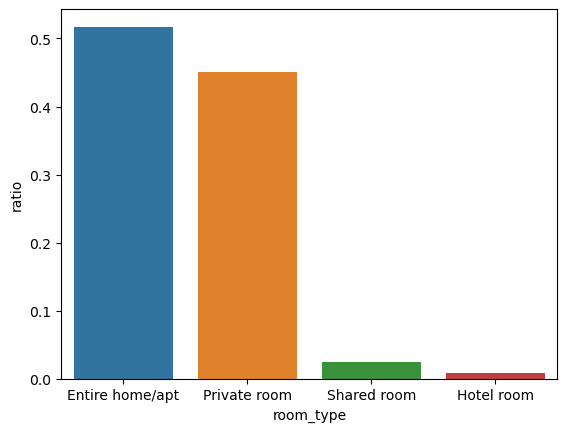

In [13]:
# Q6
sns.barplot(x=df['room_type'].value_counts().index, y=(df['room_type'].value_counts()/len(df)))
plt.ylabel('ratio')

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

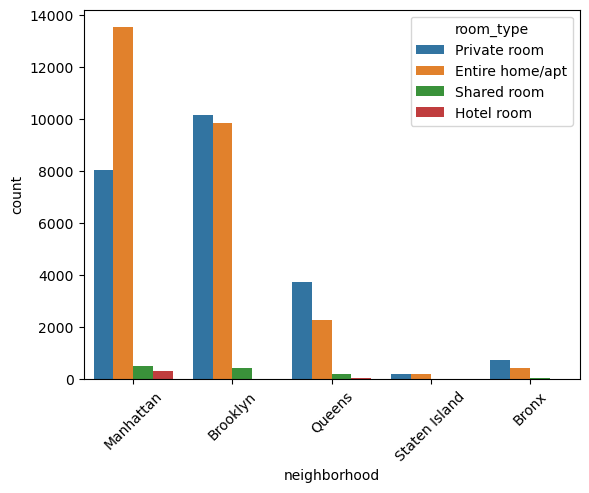

In [14]:
# Q7
sns.countplot(x='neighborhood', hue='room_type', data=df)
plt.xticks(rotation=45)
plt.legend(title='room_type')
plt.show()

- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

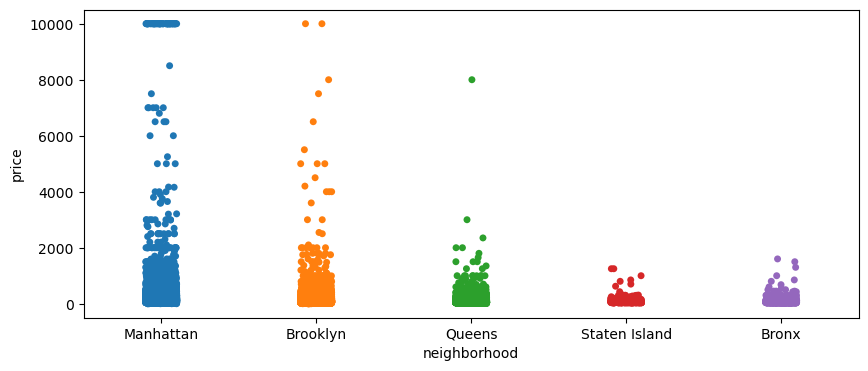

In [15]:
# Q8
# plt.figure() 여기부턴 직접 사이즈 조절해보세요
plt.figure(figsize=(10, 4))
sns.stripplot(x='neighborhood', y='price', hue='neighborhood', data=df, jitter=True)
plt.legend().remove()

- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

#Q9
1. Q5, Q6 -> "Entire home/apt" 타입의 방이 가장 많은 비율을 차지하고 있으며, "Private room" 타입의 방이 그 다음으로 많은 비율을 차지하고 있습니다. 이는 런던의 Airbnb 방들 중 대부분이 전체 공간이나 개인실로 제공되고 있다는 것을 의미합니다.

2. Q7 -> 지역별로 방의 타입 분포가 다릅니다. 예를 들어, "Kensington and Chelsea" 지역에서는 "Entire home/apt" 타입의 방이 가장 많은 비율을 차지하고 있지만, "Tower Hamlets" 지역에서는 "Private room" 타입의 방이 가장 많은 비율을 차지하고 있습니다. 이는 지역마다 호스트들의 방 제공 성향이 다르다는 것을 의미합니다.

3. Q8 -> 지역별로 가격의 분포가 다릅니다. 예를 들어, "Kensington and Chelsea" 지역에서는 가격이 상대적으로 높은 방이 많이 있지만, "Tower Hamlets" 지역에서는 가격이 낮은 방이 많이 있습니다. 이는 지역마다 부동산 시장의 특성과 수요-공급 상황에 따라 가격이 형성되고 있다는 것을 의미합니다.

---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

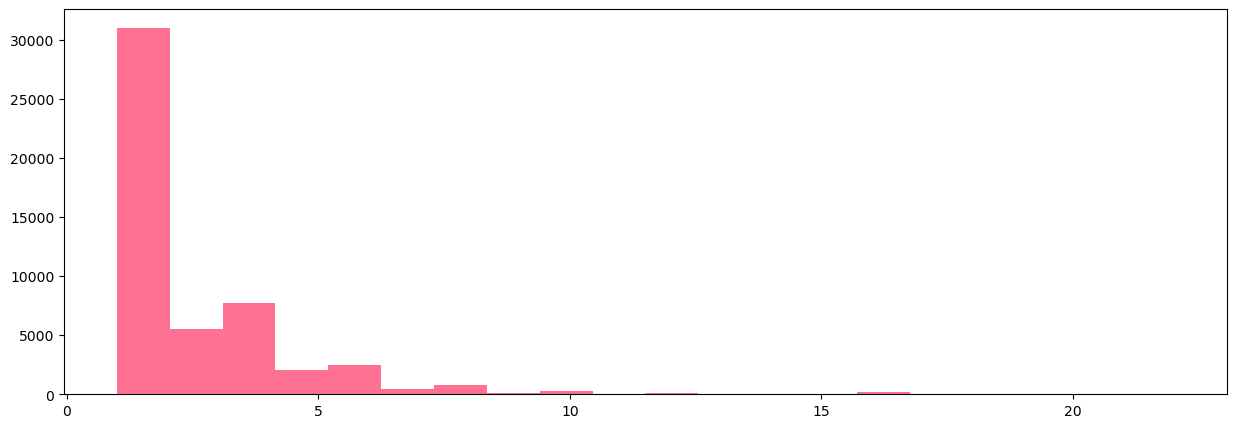

In [16]:
# Q10
plt.figure(figsize=(15, 5))
plt.hist(df['accommodates'], bins=20, color=(255/255, 113/255, 147/255), edgecolor='none')
plt.show()

- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

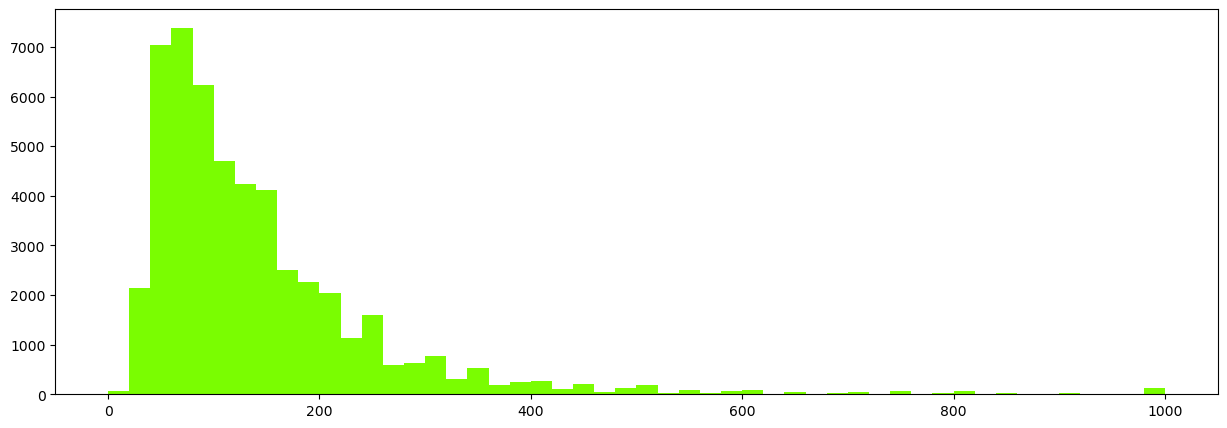

In [17]:
# Q11
plt.figure(figsize=(15, 5))
plt.hist(df['price'], bins=50,  range=(0, 1000), color=(122/255, 253/255, 1/255), edgecolor='none')
plt.show()

---
### 5) Feature Engineering

feature에 대한 전처리를 하기 이전에 결측치가 있는 column을 모두 제거했는데, 다시 초기 상태로 되돌리고 진행하겠습니다.

In [18]:
df = pd.read_csv('/Users/younyoung/Library/Mobile Documents/com~apple~CloudDocs/YBIGTA/2024-1 교육세션/0109 EDA-FE/Data/airbnb_listings.csv', index_col=0)

/var/folders/31/h029hgfj1d78nptdq7y8vwh00000gn/T/ipykernel_92005/4276139125.py:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/younyoung/Library/Mobile Documents/com~apple~CloudDocs/YBIGTA/2024-1 교육세션/0109 EDA-FE/Data/airbnb_listings.csv', index_col=0)


- #### <font color='orange'> Q12. 결측치에 대한 처리를 하고 싶습니다.
#### <font color='orange'> 주어진 모든 column들에 대하여 결측치가 25%이상인 경우에는 column을 drop하고 10%이상 25%미만인 경우에는 결측치가 있는 row만 drop하고, 10%미만인 경우에는 중앙값으로 대체해주세요.

In [19]:
# Q12
for col in df.columns:
    if df[col].isnull().sum() >= len(df) * 0.25:
        df.drop(col, axis=1, inplace=True)
    elif df[col].isnull().sum() >= len(df) * 0.1 and df[col].isnull().sum() < len(df) * 0.25:
        df.dropna(subset=[col], axis=0, inplace=True)
    else:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39365 entries, 0 to 50694
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                39365 non-null  int64  
 1   host_is_superhost                 39365 non-null  object 
 2   host_listings_count               39365 non-null  float64
 3   host_total_listings_count         39365 non-null  float64
 4   host_verifications                39365 non-null  object 
 5   host_has_profile_pic              39365 non-null  object 
 6   host_identity_verified            39365 non-null  object 
 7   neighborhood                      39365 non-null  object 
 8   latitude                          39365 non-null  float64
 9   longitude                         39365 non-null  float64
 10  is_location_exact                 39365 non-null  object 
 11  property_type                     39365 non-null  object 
 12  room_type

- #### <font color='orange'> Q13. 앞서 진행한 EDA를 바탕으로 FE를 진행하고자 합니다..
#### <font color='orange'> 총 3개의 FE를 진행하시고, 해당 FE를 진행한 이유에 대해 **간단히** 작성해주세요.


In [21]:
#Q13-1) StandardScaler: 거리 기반 알고리즘 모델이나 PCA(분산 기반)을 사용할 때 필요하므로 진행. 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[['price']])
df['price_standard'] = scaler.transform(df[['price']])
df[['price', 'price_standard']].head()

,price,price_standard
0,100,-0.146180
1,225,0.203597
2,89,-0.176961
3,200,0.133642
4,94,-0.162970


In [22]:
#Q13-2) mRMR: 입력변수가 너무 많으면 과적합의 위험이 있으므로 변수 선택 진행. mRMR을 통해 다중공선성은 적은데 y값과의 상관관계가 높은 변수를 선택.

k = 10 
S = []

# 1. X와 y의 상관계수 행렬
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
corr_matrix = (numeric_df.corr().drop('price'))

# 2. y값과 가장 상관관계 높은 변수를 첫번째 중요변수로 선정
highest_corr_idx = np.argmax(corr_matrix['price'])
first_feature = corr_matrix.index[highest_corr_idx]

# 3. 첫번째 중요변수를 변수 집합 S에 추가
S.append(first_feature)

# 4. |S|=k 까지 반복
for i in range(k - 1):
    relevance = np.abs(corr_matrix['price'])
    redundancy = np.mean(np.abs(corr_matrix.loc[:, S]), axis=1)
    candidate_feature = (relevance - redundancy)
    candidate_feature = candidate_feature.drop(S)  # 선택된 중요변수 집합 제외
    best_x_idx = np.argmax(candidate_feature)
    next_feature = candidate_feature.index[best_x_idx]
    S.append(next_feature)

print(S)

['price_standard', 'longitude', 'accommodates', 'review_scores_value', 'bathrooms', 'maximum_nights', 'host_listings_count', 'availability_30', 'latitude', 'bedrooms']


In [23]:
#Q13-3) One-Hot Encoding: 범주형 변수를 변환하여 다양한 모델에 적용할 수 있도록 함.

categorical_df = df.select_dtypes(include=['object'])
encoded_categorical_df = pd.get_dummies(categorical_df)

# Concatenate numeric and encoded categorical variables
processed_df = pd.concat([numeric_df, encoded_categorical_df], axis=1)
processed_df.head()

,id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,...,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t
0,2060,0.0,0.0,40.85722,-73.93790,2,1.0,1.0,2.0,100,...,True,False,False,False,False,False,True,False,True,False
1,2595,6.0,6.0,40.75362,-73.98377,2,1.0,0.0,1.0,225,...,False,False,False,True,False,False,False,True,False,True
2,3831,1.0,1.0,40.68514,-73.95976,3,1.0,1.0,4.0,89,...,False,True,False,False,False,False,True,False,True,False
3,5099,1.0,1.0,40.74767,-73.97500,2,1.0,1.0,1.0,200,...,False,True,False,False,False,False,False,True,False,True
4,5114,3.0,3.0,40.71910,-73.99040,2,1.0,1.0,1.0,94,...,False,False,False,True,False,False,True,False,True,False


---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

또한 FE를 통하여 여러분들이 실제로 필요한 모델에 필요한 변수 형태를 띄게 변수를 바꿔주는 과정 또한 필수적인 과정이니, 다양한 방법의 FE 역시 숙지해 두시는 게 좋습니다

---